# 1. Crecimiento de la bacteria _V. natriegens_ en medio de cultivo con pH de 7.85

En algún experimento se recopilarón los siguientes datos del crecimiento de la población de bacterias.
Donde "Índice de Tiempo" se refiere a intervalos de 16 minutos.

| Tiempo (minutos) | Índice de Tiempo | Densidad de Población |
|------------------|------------------|-----------------------|
| 0                | 0                | 0.028                 |
| 16               | 1                | 0.047                 |
| 32               | 2                | 0.082                 |
| 48               | 3                | 0.141                 |
| 64               | 4                | 0.240                 |
| 80               | 5                | 0.381                 |

### $\mathrm{i}$) Repitase el análisis de datos visto en clases para esta tabla.

#### Notación
Usamos $t$ para denotar el intervalo de tiempo de 16 minutos en que se mide la densidad de población $B_t$; dónde $B_t$ se mide al inicio del intervalo y $t=0$ es el primer intervalo. Así $B_t$ ha sido medido a los $t\times 16$ minutos. Usamos $\Delta$ para asociar el símbolo $\Delta X_y$ con $X_{y+1}-X_y$ por igualdad.

#### Gráficas
Buscamos una relación entre los datos para obtener una ecuación dinámica de la que posiblemente conozcamos una solución y modele el fenomeno con precisión. Encontrar la ecuación de una recta es sencillo, por lo que aplicando transformaciones a los datos esperamos encontrar una relación lineal.

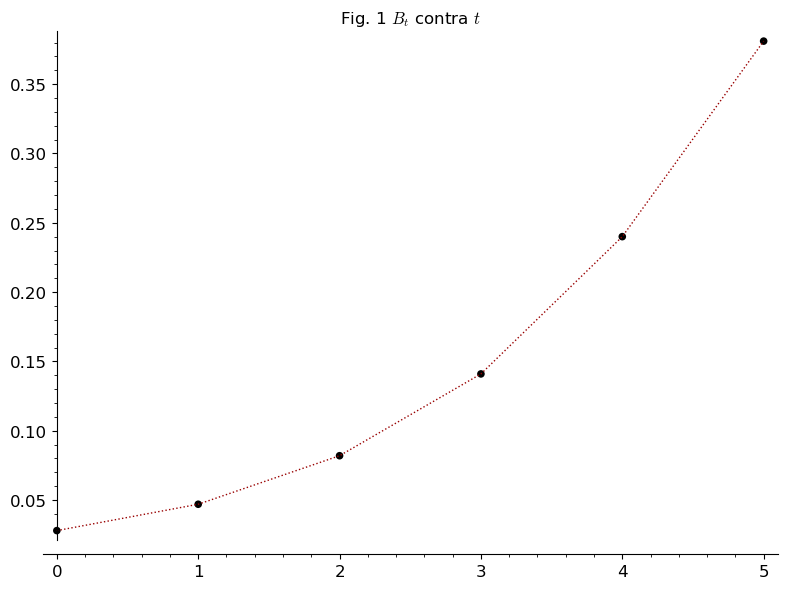

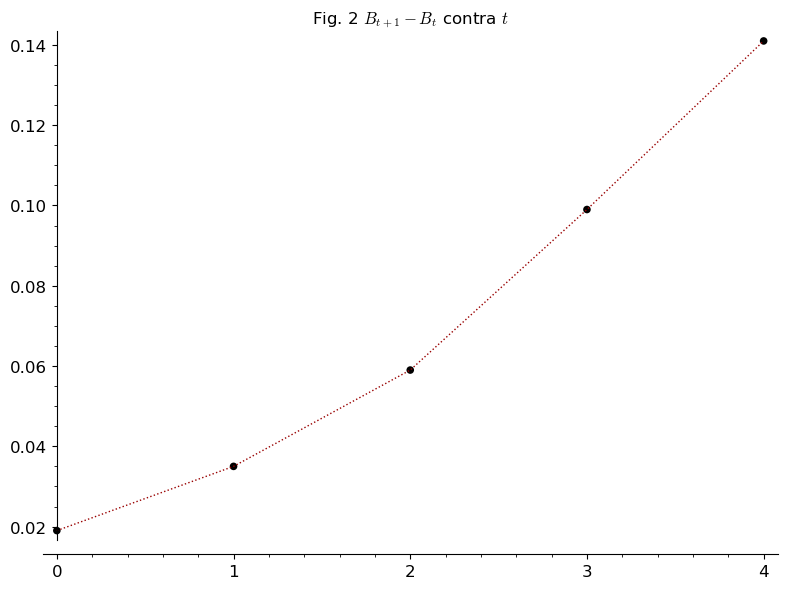

In [367]:
def dotted(tabla, label=None):
    return plot(points(tabla, rgbcolor=(0,0,0), pointsize=30, legend_label=label)+
                list_plot(tabla, plotjoined=True, linestyle=":", rgbcolor=(0.6,0,0)))

def cshow(ctabla, ctitle=None, cticks=None, #ticks es un arreglo con el tamaño de escalón de cada eje
          cfigsize=8, cfontsize=12):
    return show(dotted(tabla=ctabla), title=ctitle, ticks=cticks,
                figsize=cfigsize, fontsize=cfontsize) 
    
Tabla1 = [(0, 0.028),
        (1, 0.047),
        (2, 0.082),
        (3, 0.141),
        (4, 0.240),
        (5, 0.381)]

Tabla2 = list()
for t in range(5):
    Tabla2.append( (t, Tabla1[t+1][1]-Tabla1[t][1]) ) # <- aumento B_{t+1}-B_t
    
cshow(Tabla1, ctitle="Fig. 1 $B_t$ contra $t$", cticks = [1,None])
cshow(Tabla2, ctitle="Fig. 2 $B_{t+1}-B_t$ contra $t$", cticks = [1,None])

Se observa de la figura 1 que cada vez está más separado un valor de otro, con lo que el crecimiento se hace cada vez mayor. Pero de la figura 2 se observa que el crecimiento $B_{t+1}-B_t$ tampoco es lineal sobre el tiempo. Cada vez su taza de crecimiento, representada por la pendiente de la recta aumenta en $t$ (a excepción de con el último punto). 

Como $B_t$ también aumenta con el tiempo, se piensa que podría relacionarse mejor (linealmente) con $B_{t+1}-B_{t}$ que $t$. Dado que ambas son cantidades que aumentan con el tiempo.

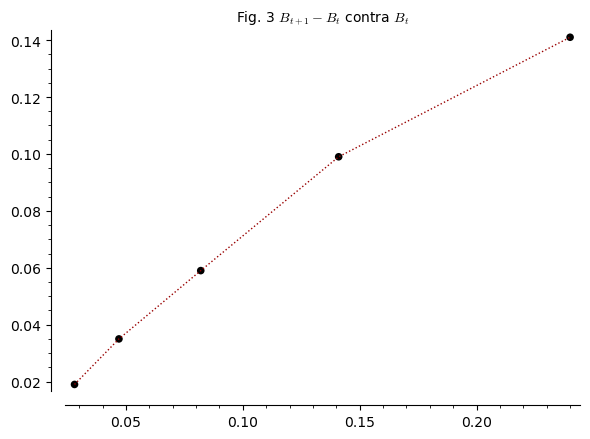

In [131]:
Tabla3 = list()
for t in range(5):
    Tabla3.append( (Tabla1[t][1], Tabla2[t][1]) )
    
dotted(Tabla3, "Fig. 3 $B_{t+1}-B_t$ contra $B_t$")

Nos referimos al conjunto de puntos $(t,B_t)$ representados en la figura 1 por "conjunto de densidades" y al conjunto de puntos $(B_t,\Delta B_t)$ de la figura 3 "conjunto de aumentos". Pero cuando no haya confusión nos referiremos solo a "puntos". 

No es difícil ver que los datos de la figura 3 se ajustan mejor a una recta que los de la figura 1 o 2. Algunos puntos parecen ser no colineales con el resto; en el sentido que acercar una recta a ellos causa que los otros puntos estén más lejos de ella, independientemente de la pendiente que tenga la recta. Pueden ser estos puntos errores de medición o no. 

Si no es error de medición, puede que:
1. El fenomeno es lineal solo localmente, en intervalos lo suficientemente pequeños de tiempo; o en intervalos de densidades suficientemente cercanas. Es decir, otra recta con otra pendiente predecirá mejor en otro intervalo de tiempo o de densidad.
2. El fenomeno deja de ser descrito linealmente en cualquier intervalo de tiempo o de densidad tras cierto tiempo o nivel de densidad; no es descrito por una función de tiempo o densidad aproximable.

De qué caso se trata lo podría determinar un experto en el tema, no habría utilidad en el segundo caso de tomar en cuenta los puntos anormales pues no se pueden predecir los puntos cercanos a este, dependiendo de qué tan aleatorio sea el proceso.
En el primer caso, podría valer la pena tomar en cuenta los puntos anormales de alguna forma en el análisis. Pues linealidad local implica continuidad, y los puntos cercanos a ellos deberían de ser predecidos con mejor precisión si se toman en cuenta; pero en la otra mano también los puntos lejanos son peormente aproximados por la misma recta. Por lo que predecir los datos por multiples rectas o interpolación sería lo más preciso en el primer caso. Sin embargo este fenomeno es conocido, por lo que descartar el punto con peor 

En la figura 3 se ve que los puntos mejor ajustados a una recta en este caso tienen $t=1,2,3$, con el punto con $t=0$ estando más cerca que el punto con $t=4$. 

A continuación nos dedicamos a encontrar la pendiente y punto que mejor modelen los datos del conjunto de aumentos. Esto nos dará la ecuación dinámica, que tras obtener solucionamos para tener un modelo del conjunto de densidades, el cuál es el objetivo principal.

### Pendiente
Para $t=0,1,2,3$: La pendiente $m_t$ de la recta que conecta
$(B_t,\Delta B_t)$ con $(B_{t+1}, \Delta B_{t+1})$ es 
$$\frac{\Delta B_{t+1} - \Delta B_t}{B_{t+1} - B_t} = \frac{\Delta B_{t+1}-\Delta B_t}{\Delta B_t}.$$
O lo que es lo mismo $$m_t = \frac{\Delta B_{t+1}}{\Delta B_t}-1.$$

| $t$           | $B_t$ | $\Delta B_t$ | $m_t$  |
|-----          |-------|---------------|--------|
| 0             | 0.028 | 0.019         | 0.842  |
| 1             | 0.047 | 0.035         | 0.686  |
| 2             | 0.082 | 0.059         | 0.678  |
| 3             | 0.141 | 0.099         | 0.424  |
| 4             | 0.240 | 0.141         |        |
| 5             | 0.381 |               |        |
|Promedio Total |

##### Figura 4.  Una tabla de lo que sabemos hasta ahora

In [366]:
lista_m = list()
for t in range(len(Tabla3)-1):
    lista_m.append(Tabla3[t+1][1]/Tabla3[t][1]-1) # elementos m_0,m_1,m_2,m_3

#promedio sin ultimo elemento    
k1 = (sum(lista_m)-lista_m[len(lista_m)-1])/(len(lista_m)-1); print("k_1 = ",k1) 

#promedio ponderado "a ojo"
k2  = 3*lista_m[0]                 
k2 += 4*lista_m[1]
k2 += 4*lista_m[2]
k2 += 1*lista_m[3]
k2 = k2/12
print("k_2 = ", k2)

#promedio ponderado por distancia al promedio
k3 = 0
s = 0
for j in range(len(lista_m)):
    s += 1/(abs(lista_m[j]-mean(lista_m))+.1)
    k3+= 1/(abs(lista_m[j]-mean(lista_m))+.1)*lista_m[j]
k3 = k3/s
print("k_3 = ", k3)

k_1 =  0.735261883522365
k_2 =  0.700439980279409
k_3 =  0.672476427395607


De la tabla de la tabla de la figura 4 se tiene que el promedio de las pendientes tomando en cuenta los tres primeros puntos es $k_1=0.735$. Consideremos también $k_2=0.700$ el promedio dandole un peso distinto a cada punto dependiendo (a ojo) qué tan bien se ajusten en una recta. 

### Punto
Para el punto por el que pasa la recta, consideramos dos. $(a,b)$ donde
1. $a$ es el promedio de $B_t,t=0,1,2,3,4$ y $b$ el promedio de $\Delta B_t, t=0,1,2,3$. Pues el último punto no se considera bien medido o la varianza del fenomeno a partir de tal tiempo es alta.
2. $a$ es el promedio de $B_t,t=0,1,2,3,4,5$ y $b$ el promedio de $\Delta B_t, t=0,1,2,3,4$. Pues el último punto está dentro de los valores posibles y no debería de variar mucho.
Aquí usar un promedio ponderado es menos razonable o fácil de usar porque los datos son crecientes por la naturaleza del fenomeno, y no por posibles errores de medición o una varianza natural en el fenomeno.

#### Ecuación Dinámica
Por ahora usaremos $\hat B_t$ para referirnos a la aproximación del valor $B_t$ dado por un modelo lineal. $k$ se refiere a cualquier pendiente de la recta de este modelo (recta que aproxima los datos de la figura 3). De manera que la ecuación de la recta será descrita por una ecuación en terminos de $y = \Delta \hat B_t$ y $x = \hat B_t$. Si esta pasa por $(a,b)$ tenemos para $t\geq 0$
$$\Delta \hat B_t - b = k (\hat B_t - a).$$
Y en terminos de las aproximaciones de densidades,
$$\hat B_{t+1} = (1+k)\hat B_t +b-ka.$$

De manera que lo único que impediría que el modelo lineal de la figura 3 sea una recta que pase por el origen es que $b-ka$ sea significativamente alejado de 0. Sin embargo también se podría encontrar una solución para la ecuación dinámica anterior. Hágase $K = 1+k$ y $C = b-ka$ en la ecuación anterior:

$$\hat B_{t+1} = K\hat B_t +C.$$
Para $n = 1,2,\ldots$
$$
    \hat B_n = K \hat B_{n-1}+C = K \left(K \hat B_{n-2} +C\right)+C = K^2 \hat B_{n-2}+KC+C = \ldots \\
    = K^n \hat B_0+ C\sum^{n-1}_{j=0}K^j.
$$

Si $K\neq 1$, (que pasa solo cuando $k=0$, y no estamos considerando valores tan bajos)
$$
    \hat B_n = K^n \hat B_0+ C\frac{1-K^n}{1-K}.
$$

Sustituyendo de vuelta $k\neq 0$, $b$, $a$, y aceptando valores reales de $n=t\geq 0$; y tomando el valor de los datos para $t=0$ ($\hat B_0 = B_0$) la solución del sistema dinámico es
$$
    \hat B_t = (1+k)^t B_0 +(b-ka) \frac{(1+k)^t-1}{k} \\
    = (1+k)^t \left(B_0 +\frac{b}{k}-a\right)+a-\frac{b}{k}.
$$

#### Grafica de Soluciones

Grafiquemos primero la solución con las rectas pasando por distintos puntos para escoger uno, es evidente que el modelo resultante será mejor si la recta del modelo lineal intersecta uno de los puntos $(B_t, \Delta B_t)$ con $t=1,2,3$ pues estos están alineados mejor sobre una recta. Se muestra a continuación la recta sobre estos tres puntos con la pendiente $k_1$ que omite el último punto.

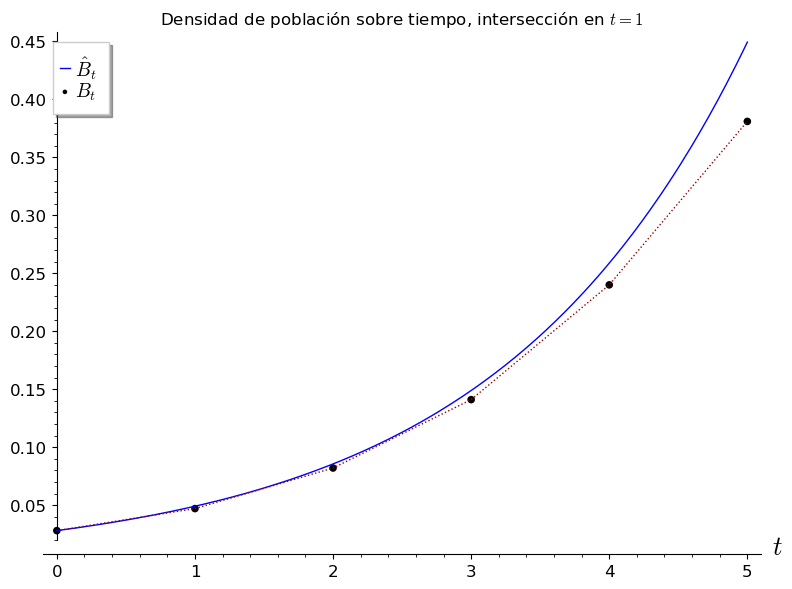

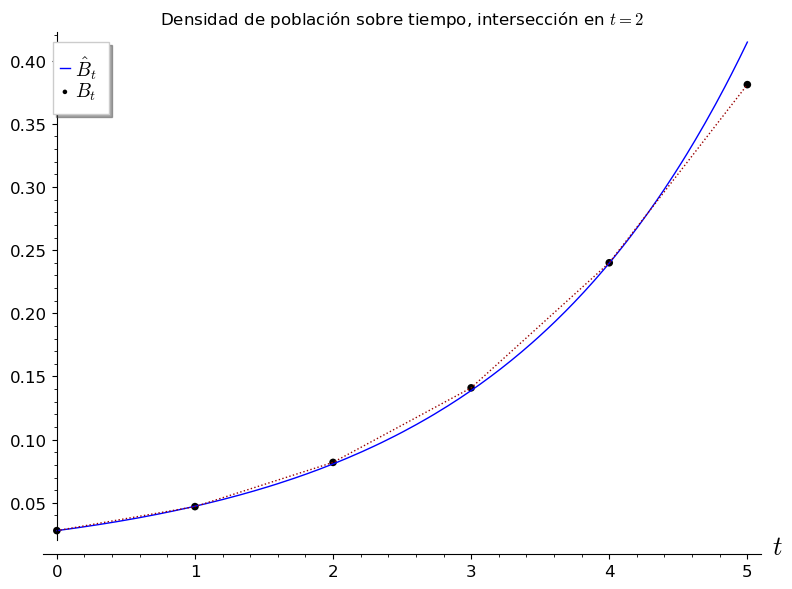

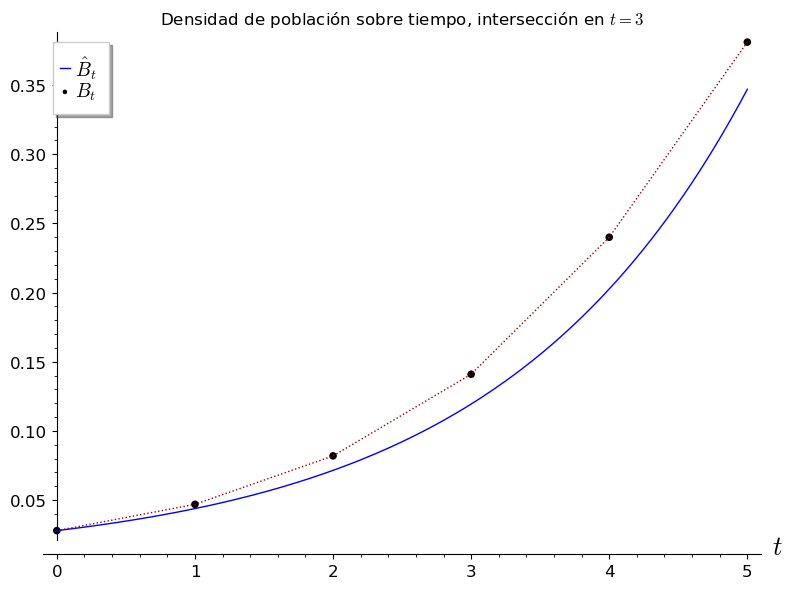

In [296]:
# Modelo de pendiente k que pasa por punto (a,b)
var('k,t,a,b') # específico de Sagemath junto con operaciones que impliquen estas variables
Recta = k*(t-a)+b
B = (1+k)^t *(0.028 +b/k-a)+a-b/k
punto_j = 0
for p in Tabla3:
    if punto_j == 0 or punto_j == len(Tabla3)-1:
        punto_j+=1
        continue
        
    if True:
        pass
    else:
        GraficaCambio = plot(Recta(t=x, a=p[0], b=p[1], k=k1), 
                  (x,0,max([Tabla3[i][0] for i in range(len(Tabla3))])), # maximo en los valores de x de la tabla
                      legend_label="$\\Delta \\hat B_t$")
        GraficaCambio.set_legend_options(font_size=14)
        show(GraficaCambio+dotted(tabla=Tabla3, label="$\\Delta B_t$"),
             title="Aumento de densidad sobre densidad, intersección en $t="+str(punto_j)+"$",
             figsize=8, fontsize=12, ticks=[0.05,None], axes_labels=['$B_t$',None])
    
    GraficaDensidad = plot(B(t=x, a=p[0], b=p[1], k=k1), (x, 0, 5), legend_label="$\\hat B_t$")
    GraficaDensidad.set_legend_options(font_size=14)
    show(GraficaDensidad+dotted(Tabla1, label="$B_t$"),
         title="Densidad de población sobre tiempo, intersección en $t="+str(punto_j)+"$",
         figsize=8, fontsize=12, axes_labels=['$t$',None])
    print("\n")
    
    punto_j+=1

Se observa fácilmente que con $t=2$ el modelo mejor se ajusta a los datos aún sin considerar el último punto en la pendiente promedio, ¿Qué pasa si se añade el último punto al promedio con un peso menor? Las siguientes graficas son de el modelo tomando en cuenta el último punto.

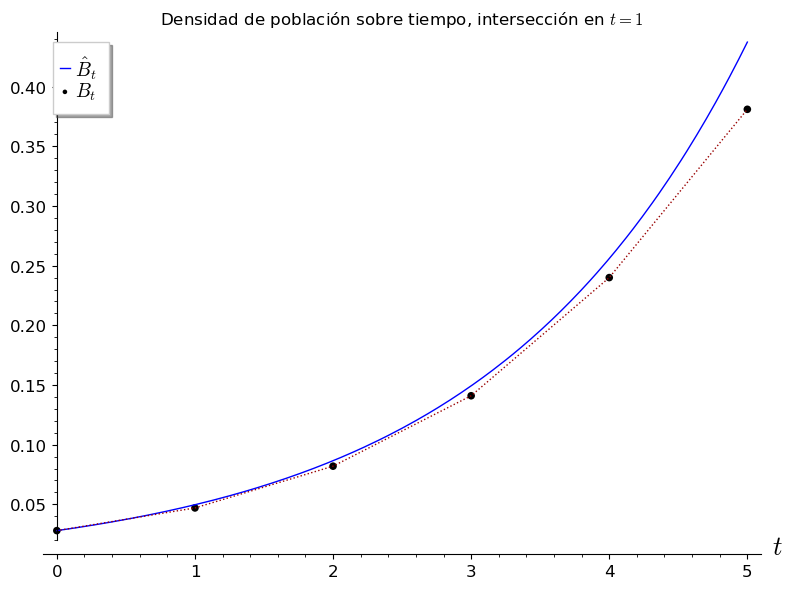

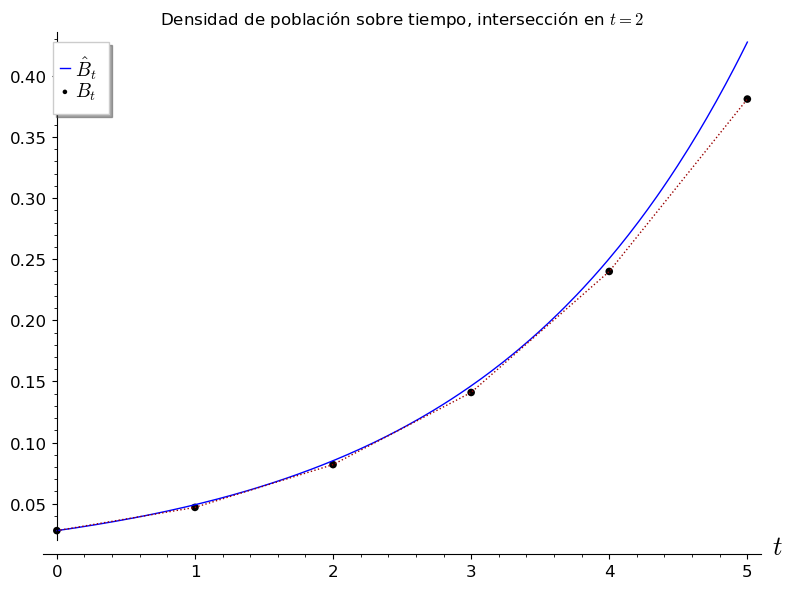

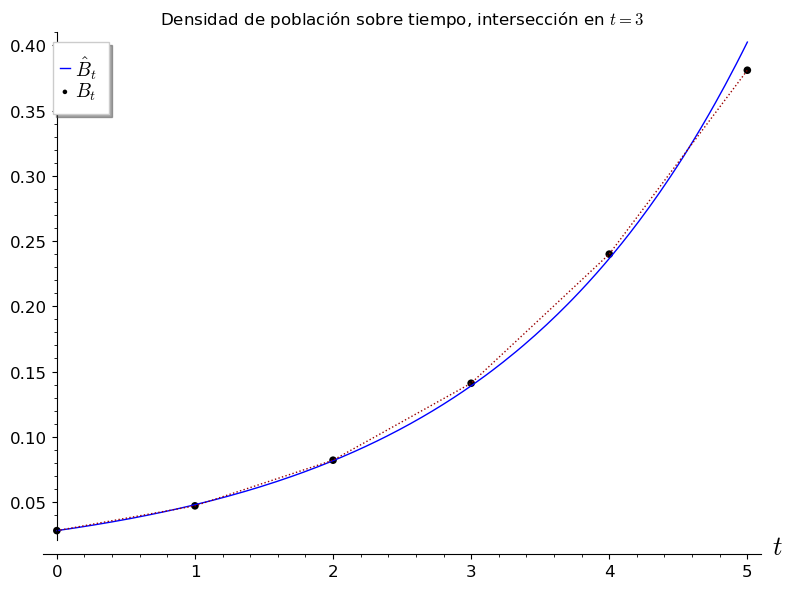

In [361]:
# Modelo de pendiente k que pasa por punto (a,b)
var('k,t,a,b') # específico de Sagemath junto con operaciones que impliquen estas variables
Recta = k*(t-a)+b
B = (1+k)^t *(0.028 +b/k-a)+a-b/k
punto_j = 0
for p in Tabla3:
    if punto_j == 0 or punto_j == len(Tabla3)-1:
        punto_j+=1
        continue
        
    if True:
        pass
    else:
        GraficaCambio = plot(Recta(t=x, a=p[0], b=p[1], k=k2), 
                  (x,0,max([Tabla3[i][0] for i in range(len(Tabla3))])), # maximo en los valores de x de la tabla
                      legend_label="$\\Delta \\hat B_t$")
        GraficaCambio.set_legend_options(font_size=14)
        show(GraficaCambio+dotted(tabla=Tabla3, label="$\\Delta B_t$"),
             title="Aumento de densidad sobre densidad, intersección en $t="+str(punto_j)+"$",
             figsize=8, fontsize=12, ticks=[0.05,None], axes_labels=['$B_t$',None])
    
    GraficaDensidad = plot(B(t=x, a=p[0], b=p[1], k=k2), (x, 0, 5), legend_label="$\\hat B_t$")
    GraficaDensidad.set_legend_options(font_size=14)
    show(GraficaDensidad+dotted(Tabla1, label="$B_t$"),
         title="Densidad de población sobre tiempo, intersección en $t="+str(punto_j)+"$",
         figsize=8, fontsize=12, axes_labels=['$t$',None])
    print("\n")
    
    punto_j+=1

Como se puede observar, con excepción de usar intersección en $t=3$ el modelo sobrestima el resultado real. Incluso en el último caso, cuando $t=1,2,3,4$ se tiene una sobreestimación pequeña mientras 

##### Descripción del Experimento

El biólogo propone que en un intervalo de tiempo constante (en este caso 16 minutos), una fracción de la población de bacterias se "divide"; como resultado de tal proceso llamado fisión binaria, una bacteria se convierte en dos bacterias. Tal supuesto será altamente preciso solo durante que las condiciones del experimento se mantengan lo suficientemente similares. Entre estas condiciones conocidas por el biólogo, que la densidad de población se mantenga bajo cierto nivel y que haya abundantes nutrientes. Con estos supuestos sobre el fénomeno, usamos la siguiente notación: